In [1]:
import numpy as np
from math import pi

from stylo.domain.transform import translate, rotate
from stylo.color import FillColor
from stylo.shape import Shape, Circle, Square, Ellipse, Rectangle
from stylo.image import LayeredImage

In [2]:
black = FillColor("000000")
red = FillColor("ff0000")
gold = FillColor("ffff00")

In [3]:
def ored(*args):
    
    xs = False
    
    for condition in args:
        xs = np.logical_or(xs, condition)
        
    return xs

In [4]:
class Cracker(Shape):
    
    def __init__(self, scale=1):
        self.scale = scale
    
    def draw(self):
        
        def join(x, y):
            return np.abs(y) < np.abs(x)
           
        left1 = Rectangle(-1, 0, width=0.5, height=0.5)
        right1 = Rectangle(1, 0, width=0.5, height=0.5)
        middle = Rectangle(0, 0, width=1, height=0.5)
        
        def cracker(x, y):
            x = x / self.scale
            y = y / self.scale
            
            left_join = np.logical_and(np.abs(y) < 0.25, join(x - 0.625, y/2))
            left_join = np.logical_and(left_join, np.abs(x - 0.6) < 0.25)
                                
            right_join = np.logical_and(np.abs(y) < 0.25, join(x + 0.625, y/2))
            right_join = np.logical_and(right_join, np.abs(x + 0.6) < 0.25)
         
            body = np.logical_or(left1(x=x, y=y), right1(x=x, y=y))
            body = np.logical_or(body, middle(x=x, y=y))
            
            cracker_shape = np.logical_or(body, left_join)
            cracker_shape = np.logical_or(cracker_shape, right_join)
            
            return cracker_shape
            
        return cracker
    
class Bands(Shape):
    
    def __init__(self, cracker):
        self.cracker = cracker
        
    def draw(self):
        
        def bands(x, y):
            
            x1 = np.logical_and(np.abs(x) > 0.90, np.abs(x) < 0.94)
            x2 = np.logical_and(np.abs(x) > 0.86, np.abs(x) < 0.88)
            x3 = np.logical_and(np.abs(x) > 0.35, np.abs(x) < 0.6)
            
            xs = ored(x1, x2, x3)
            
            return np.logical_and(xs, self.cracker(x=x, y=y))
            
        return bands
    
class Spots(Shape):
    
    def __init__(self, cracker):
        self.cracker = cracker
        
    def draw(self):
        
        xs = np.linspace(-1, 1, 16)
        ys = np.linspace(-1, 1, 16)
        
        dots = [
            Circle(x=x, y=y, fill=True, r=0.02) for x in xs for y in ys
        ]
        
        def spots(x, y):
            
            # Rotate the domain by hand.
            rx = np.cos(-pi/4)*x - np.sin(-pi/4)*y
            ry = np.sin(-pi/4)*x + np.cos(-pi/4)*y
            
            conds = [c(x=rx, y=ry) for c in dots]
            
            return np.logical_and(ored(*conds), self.cracker(x=x, y=y))
        
        return spots
    
class Curves(Shape):
    
    def __init__(self, cracker):
        self.cracker = cracker
        
    def draw(self):
        
        def curves(x, y):
            
            ys = np.abs(y*8) < np.cos(4*x*pi) * np.cos(4*x*pi) 
            
            return np.logical_and(ys, self.cracker(x=x, y=y))
            
        return curves

In [5]:
cracker1 = Cracker(scale=0.75) >> rotate(-pi/6) >> translate(-.8, 0.35)
bands = Bands(cracker1) >> rotate(-pi/6) >> translate(-.8, 0.35)

cracker2 = Cracker(scale=0.75) >> rotate(-pi/6)
spots = Spots(cracker2) >> rotate(-pi/6)

cracker3 = Cracker(scale=0.75) >> rotate(-pi/6) >> translate(.8, -0.35)
curves = Curves(cracker3) >> rotate(-pi/6) >> translate(.8, -0.35)

CPU times: user 7.49 s, sys: 7.07 s, total: 14.6 s
Wall time: 14.6 s


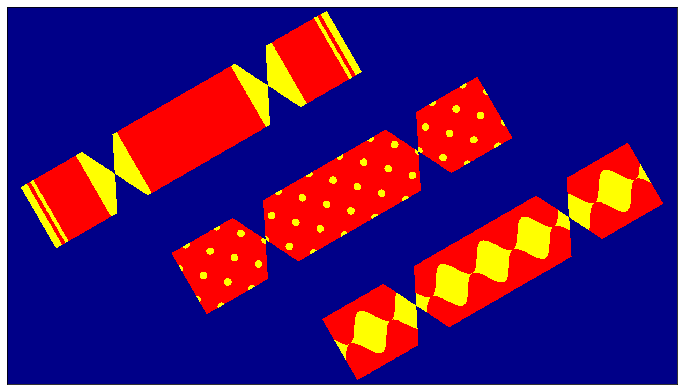

In [6]:
%%time
image = LayeredImage(background="000088")

image.add_layer(cracker1, red)
image.add_layer(bands, gold)

image.add_layer(cracker2, red)
image.add_layer(spots, gold)

image.add_layer(cracker3, red)
image.add_layer(curves, gold)

image(1920, 1080)